# 🌸 Floranet

---
- 902011, Moleri Andrea, a.moleri@campus.unimib.it
- 865939, Armani Filippo, f.armani1@campus.unimib.it
---

## 🎯 Domain and Objectives

The notebook you are about to read contains a project called Floranet, which aims to classify, through the use of machine learning and deep learning techniques, a dataset containing 102 classes of different flowers. In particular, the dataset used is known as the [Oxford Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html), compiled by Maria-Elena Nilsback and Andrew Zisserman. Each of the 102 classes consists of a variable number ranging from 40 to 258 images per class. The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories. The dataset is visualized using isomap with shape and colour features. Our aim is therefore to investigate the possibilities of building models in order to solve the classification task. In other words, given an image of a flower, we want to be able to correctly identify and recognize the flower in question, minimizing the margin of error as much as possible.

In [49]:
import os
from scipy.io import loadmat
import pandas as pd

# Paths
images_dir = 'Data/images'
labels_path = 'Data/imagelabels.mat'

# Load labels
labels_data = loadmat(labels_path)
labels = labels_data['labels'][0]

# Get images and pair with labels
image_files = sorted([img for img in os.listdir(images_dir) if img.endswith('.jpg')])
data = {'image_name': image_files, 'label': labels[:len(image_files)]}

# Create DataFrame
df = pd.DataFrame(data)

Total number of images: 8189

Number of images per class (ordered by class):
Class 1: 40 images
Class 2: 60 images
Class 3: 40 images
Class 4: 56 images
Class 5: 65 images
Class 6: 45 images
Class 7: 40 images
Class 8: 85 images
Class 9: 46 images
Class 10: 45 images
Class 11: 87 images
Class 12: 87 images
Class 13: 49 images
Class 14: 48 images
Class 15: 49 images
Class 16: 41 images
Class 17: 85 images
Class 18: 82 images
Class 19: 49 images
Class 20: 56 images
Class 21: 40 images
Class 22: 59 images
Class 23: 91 images
Class 24: 42 images
Class 25: 41 images
Class 26: 41 images
Class 27: 40 images
Class 28: 66 images
Class 29: 78 images
Class 30: 85 images
Class 31: 52 images
Class 32: 45 images
Class 33: 46 images
Class 34: 40 images
Class 35: 43 images
Class 36: 75 images
Class 37: 108 images
Class 38: 56 images
Class 39: 41 images
Class 40: 67 images
Class 41: 127 images
Class 42: 59 images
Class 43: 130 images
Class 44: 93 images
Class 45: 40 images
Class 46: 196 images
Class 47

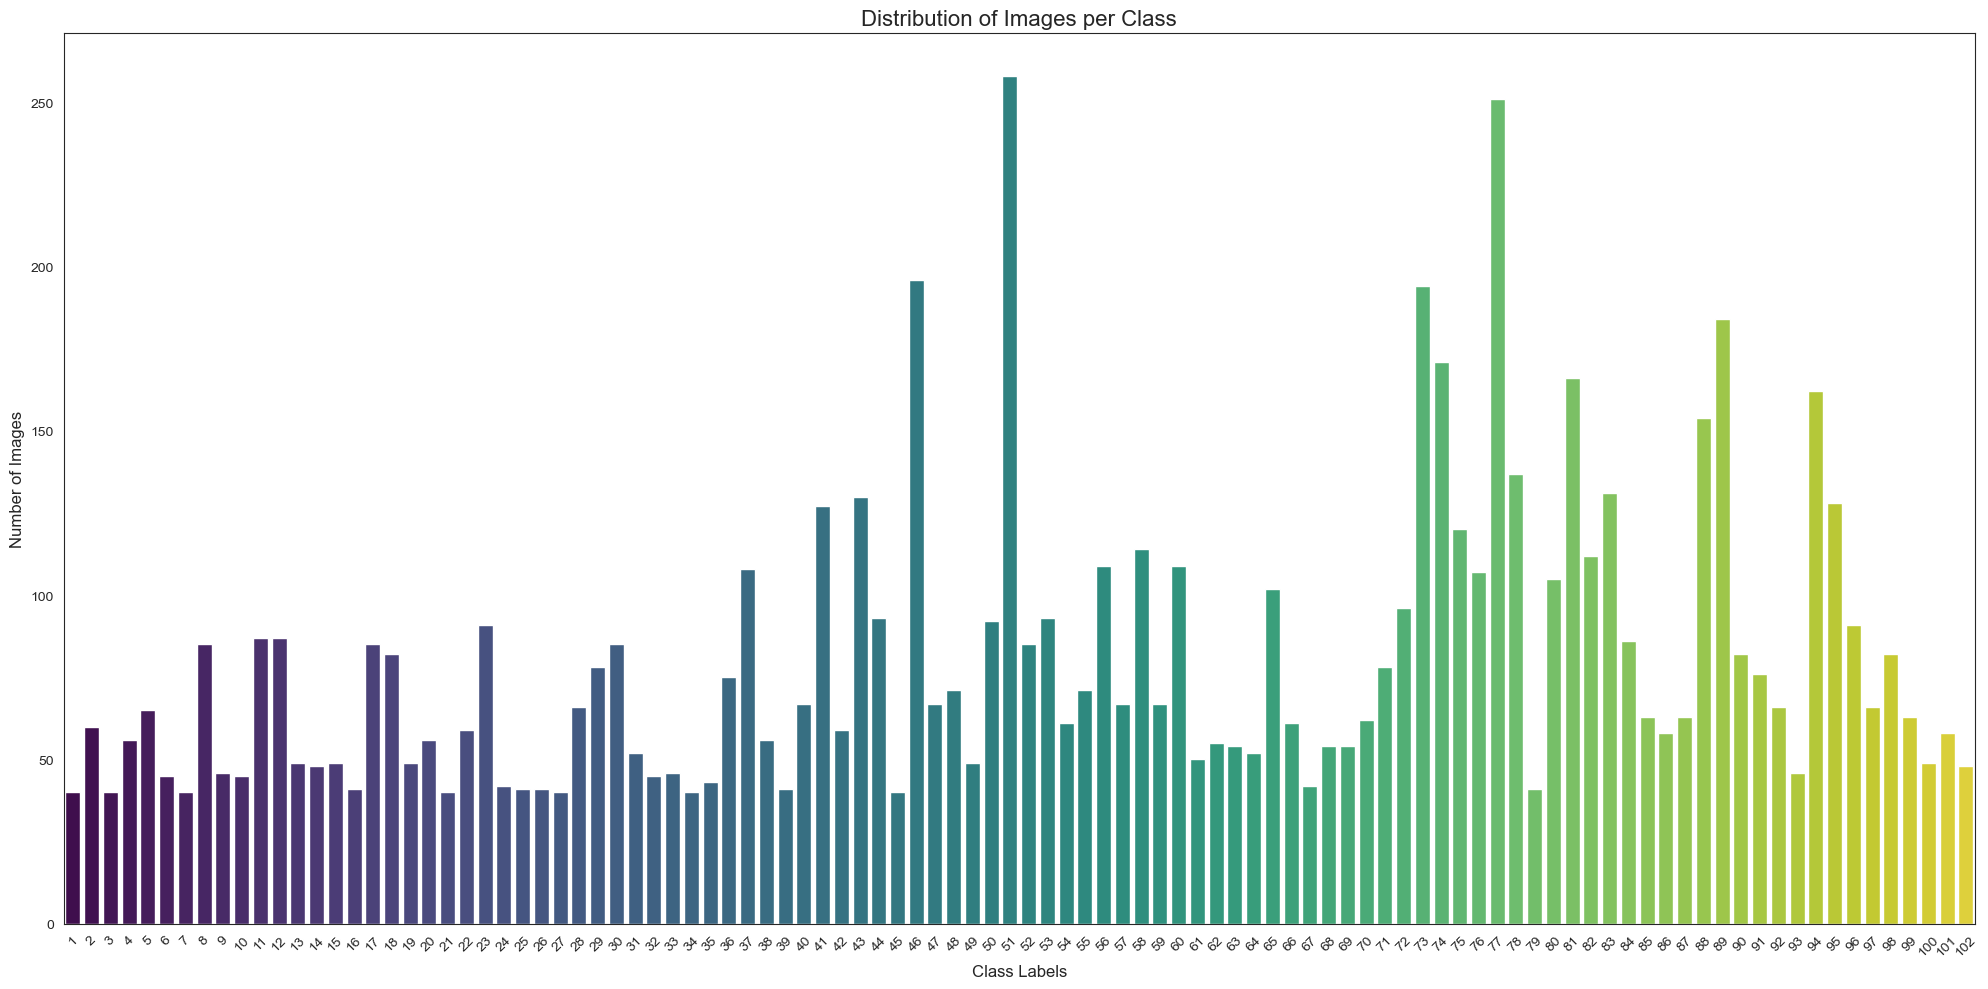

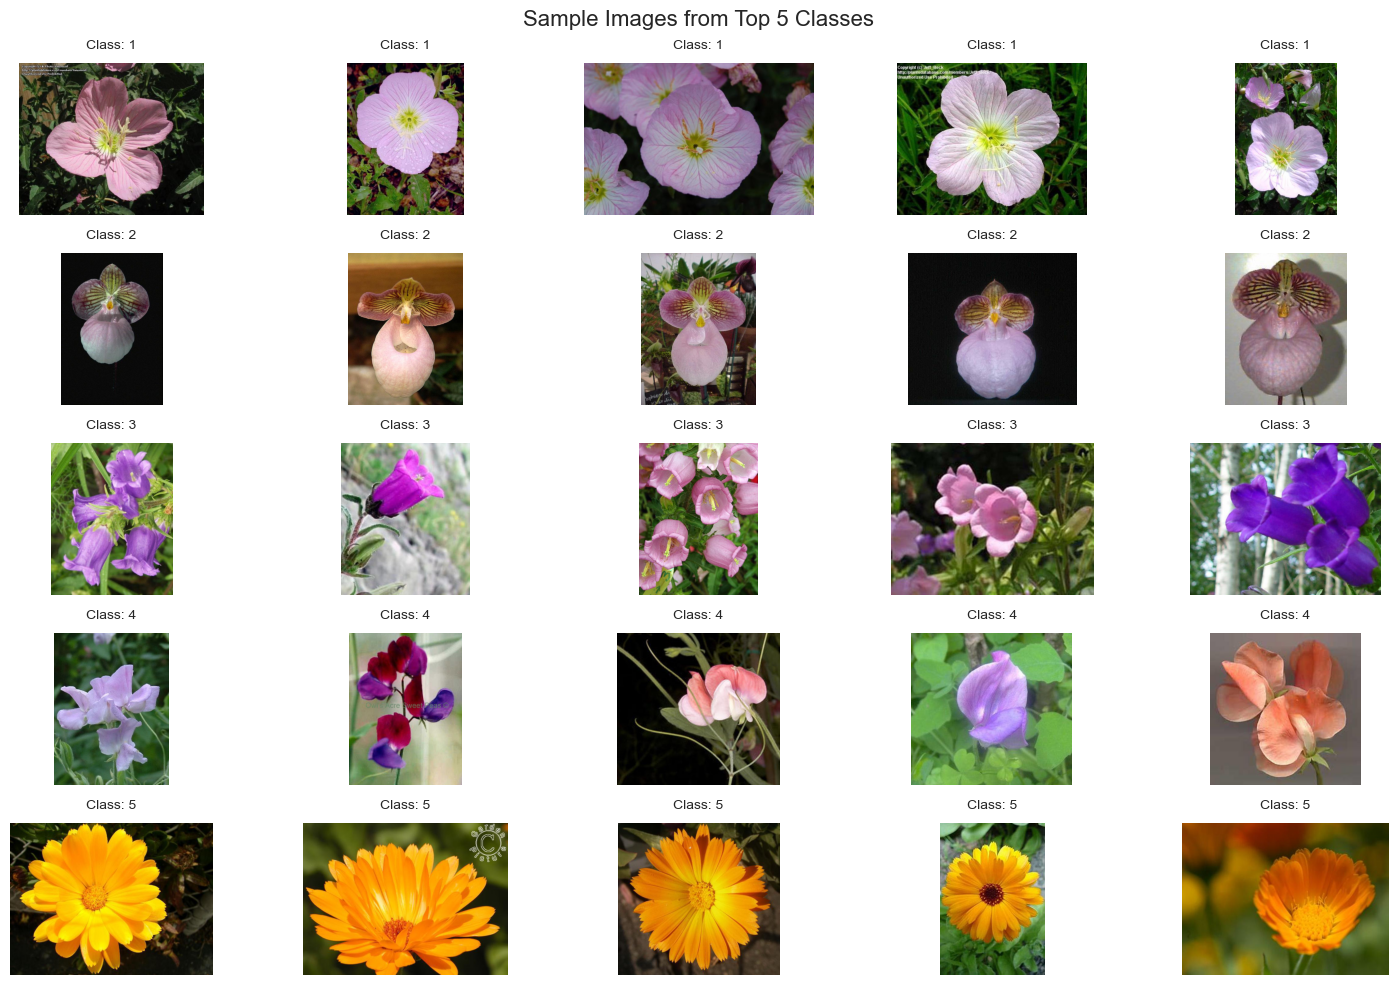

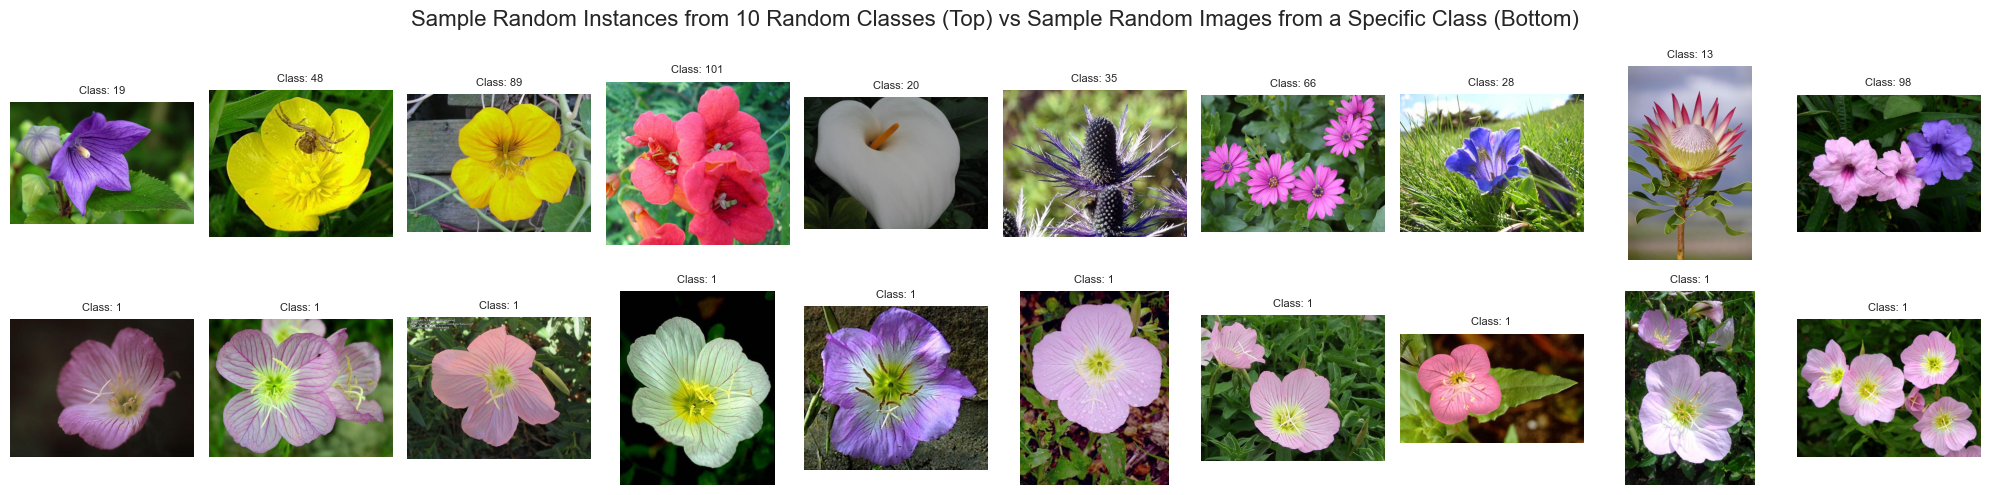

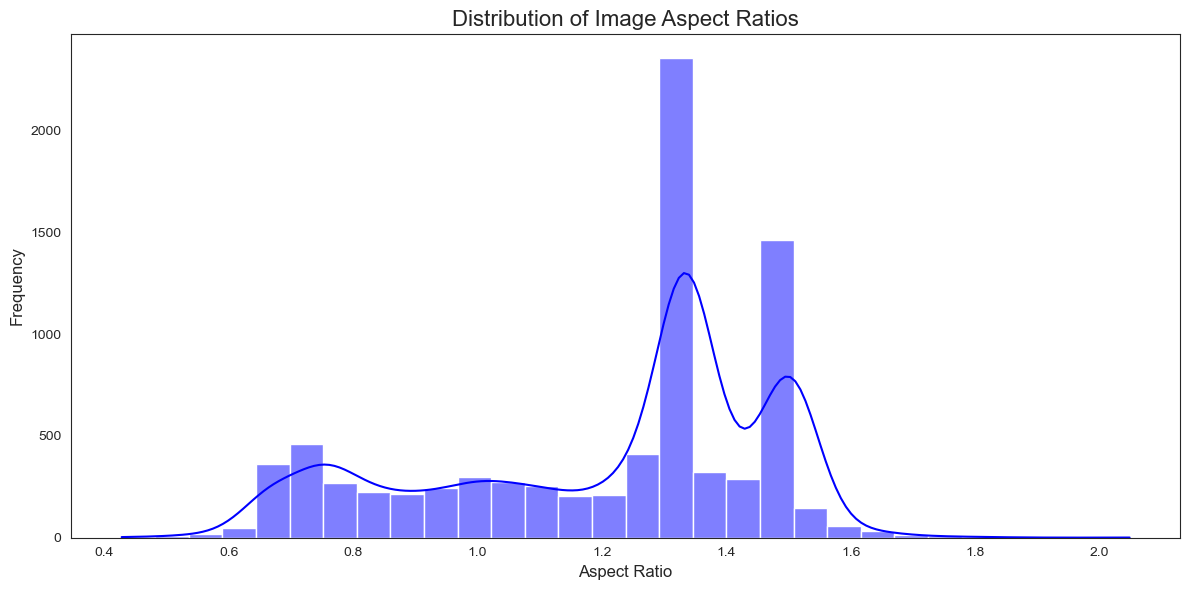


Image Dimension Statistics:
             Width       Height  Aspect Ratio
count  8189.000000  8189.000000   8189.000000
mean    630.160581   534.352058      1.210391
std      95.988254    75.453540      0.270855
min     500.000000   500.000000      0.428082
25%     501.000000   500.000000      1.000000
50%     667.000000   500.000000      1.332000
75%     699.000000   501.000000      1.398000
max    1024.000000  1168.000000      2.048000

Average number of images per class: 80.28


In [50]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Assuming df is the DataFrame and contains 'label' and 'image_name' columns
# Assuming labels contain all unique labels from the dataset

# 1. Number of total images
num_images = len(df)
print(f"Total number of images: {num_images}")

# 2. Number of images per class
images_per_class = df['label'].value_counts().sort_index()  # Sort by class labels
print("\nNumber of images per class (ordered by class):")
for label, count in images_per_class.items():
    print(f"Class {label}: {count} images")

# 3. Plotting distribution of images per class
plt.figure(figsize=(20, 10))  # Increased width and height of the figure
sns.set_style("white")  # Set plot background to white
sns.barplot(x=images_per_class.index, y=images_per_class.values, palette="viridis")
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Distribution of Images per Class', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Displaying sample images for the top 5 classes with most images
top_classes = images_per_class.head(5).index

fig, axes = plt.subplots(len(top_classes), 5, figsize=(15, 10))
for i, label in enumerate(top_classes):
    sample_images = df[df['label'] == label].sample(5)['image_name'].values
    for j, image_name in enumerate(sample_images):
        img_path = os.path.join(images_dir, image_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        # Adding the class label above each image
        axes[i, j].set_title(f"Class: {label}", fontsize=10, pad=10)
plt.suptitle('Sample Images from Top 5 Classes', fontsize=16)
plt.tight_layout()
plt.show()

# Combining 10 random images from random classes and class 1
random_classes = df['label'].drop_duplicates().sample(10).values
class_1_images = df[df['label'] == 1].sample(10)['image_name'].values

fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for i, label in enumerate(random_classes):
    image_name = df[df['label'] == label].sample(1)['image_name'].values[0]
    img_path = os.path.join(images_dir, image_name)
    img = Image.open(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Class: {label}", fontsize=8)

for i, image_name in enumerate(class_1_images):
    img_path = os.path.join(images_dir, image_name)
    img = Image.open(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title("Class: 1", fontsize=8)

plt.suptitle('Sample Random Instances from 10 Random Classes (Top) vs Sample Random Images from a Specific Class (Bottom)', fontsize=16)
plt.tight_layout()
plt.show()

# 5. Computing image dimensions and aspect ratio statistics
image_sizes = []
for image_name in df['image_name']:
    img_path = os.path.join(images_dir, image_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # (width, height)

# Converting to DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
sizes_df['Aspect Ratio'] = sizes_df['Width'] / sizes_df['Height']

# 6. Plotting distribution of aspect ratios
plt.figure(figsize=(12, 6))
sns.histplot(sizes_df['Aspect Ratio'], kde=True, color='blue', bins=30)
plt.xlabel('Aspect Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Image Aspect Ratios', fontsize=16)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nImage Dimension Statistics:")
print(sizes_df.describe())

# 7. Average number of images per class
avg_images_per_class = images_per_class.mean()
print(f"\nAverage number of images per class: {avg_images_per_class:.2f}")

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Set seed for reproducibility
seed = 42

# Splitting the dataset: 70% for training, 15% for validation, and 15% for testing
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=seed)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=seed)

# One-Hot Encoding for the labels
encoder = OneHotEncoder(sparse_output=False)  # Updated to avoid FutureWarning

# Apply One-Hot Encoding to each split
train_labels_encoded = encoder.fit_transform(train_df[['label']])
valid_labels_encoded = encoder.transform(valid_df[['label']])
test_labels_encoded = encoder.transform(test_df[['label']])

# Create a DataFrame for the one-hot encoded labels
class_columns = [f"class_{int(c)}" for c in encoder.categories_[0]]

# Concatenate the original dataframes with their respective one-hot encoded labels
train_df = pd.concat([train_df.reset_index(drop=True), pd.DataFrame(train_labels_encoded, columns=class_columns)], axis=1)
valid_df = pd.concat([valid_df.reset_index(drop=True), pd.DataFrame(valid_labels_encoded, columns=class_columns)], axis=1)
test_df = pd.concat([test_df.reset_index(drop=True), pd.DataFrame(test_labels_encoded, columns=class_columns)], axis=1)

# Get the number of images in each set
train_size = len(train_df)
valid_size = len(valid_df)
test_size = len(test_df)

# Total number of images
total_size = len(df)

# Class distribution in each set
train_class_dist = train_df['label'].value_counts().sort_index()
valid_class_dist = valid_df['label'].value_counts().sort_index()
test_class_dist = test_df['label'].value_counts().sort_index()

# Percentages of each set
train_percentage = (train_size / total_size) * 100
valid_percentage = (valid_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

# Output the results
print("🗂️ Data Split Summary\n" + "="*30)

# Total dataset size
print(f"Total number of images: {total_size} images\n")

# Size of each set
print(f"Training Set: {train_size} images ({train_percentage:.2f}%)")
print(f"Validation Set: {valid_size} images ({valid_percentage:.2f}%)")
print(f"Test Set: {test_size} images ({test_percentage:.2f}%)\n")

# Class distribution in each set
print("🧑‍🏫 Class Distribution:")
print("-"*30)

# Function to display class distributions clearly
def display_class_distribution(class_dist, set_name):
    print(f"\nClass distribution in the {set_name}:")
    print(f"{'Class':<10} {'Number of Images':<20} {'Percentage':<15}")
    print("-" * 50)
    for label, count in class_dist.items():
        percentage = (count / total_size) * 100
        print(f"{label:<10} {count:<20} {percentage:<15.2f}%")
    print("\n")

# Display class distributions for each set
display_class_distribution(train_class_dist, "Training Set")
display_class_distribution(valid_class_dist, "Validation Set")
display_class_distribution(test_class_dist, "Test Set")

# Save the sets to CSV files for further use
train_df.to_csv('Data/train_set.csv', index=False)
valid_df.to_csv('Data/valid_set.csv', index=False)
test_df.to_csv('Data/test_set.csv', index=False)

# Final summary with total number of classes
print("="*30)
print(f"Total number of classes: {df['label'].nunique()}")
print(f"Classes range from 0 to {df['label'].max()}")

🗂️ Data Split Summary
Total number of images: 8189 images

Training Set: 5732 images (70.00%)
Validation Set: 1228 images (15.00%)
Test Set: 1229 images (15.01%)

🧑‍🏫 Class Distribution:
------------------------------

Class distribution in the Training Set:
Class      Number of Images     Percentage     
--------------------------------------------------
1          28                   0.34           %
2          42                   0.51           %
3          28                   0.34           %
4          39                   0.48           %
5          46                   0.56           %
6          32                   0.39           %
7          28                   0.34           %
8          59                   0.72           %
9          32                   0.39           %
10         32                   0.39           %
11         61                   0.74           %
12         61                   0.74           %
13         34                   0.42           %
14   

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping

# Funzione per creare il modello
def create_model(input_shape=(224, 224, 3), num_classes=102, fine_tune_layers=100):
    """
    Crea un modello di rete neurale convoluzionale usando fine-tuning su EfficientNetB0.

    Parameters:
    - input_shape: tuple, forma dell'input (altezza, larghezza, canali)
    - num_classes: int, numero di classi per la classificazione
    - fine_tune_layers: int, numero di layers da sbloccare per il fine-tuning

    Returns:
    - model: il modello Keras compilato
    """

    # Carica EfficientNetB0 pre-addestrata su ImageNet (senza la parte superiore)
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

    # Congela i primi layers (fino al numero specificato di layers)
    for layer in base_model.layers[:fine_tune_layers]:
        layer.trainable = False

    # Crea il modello
    model = models.Sequential([
        base_model,  # Inserisci il modello pre-addestrato
        layers.GlobalAveragePooling2D(),  # Pooling globale per ridurre le dimensioni
        layers.Dense(1024, activation='relu'),  # Layer denso
        layers.Dropout(0.5),  # Dropout per prevenire overfitting
        layers.Dense(num_classes, activation='softmax')  # Output layer con softmax per classificazione multi-classe
    ])

    # Compila il modello
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()  # Stampa il sommario del modello

    return model

# Creazione del modello
model = create_model()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_7  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_13 (Dense)            (None, 1024)              1311744   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 102)               104550    
                                                                 
Total params: 5465865 (20.85 MB)
Trainable params: 525

Found 5732 validated image filenames.
Found 1228 validated image filenames.
Epoch 1/2
180/180 [==============================] - 276s 2s/step - loss: 4.4570 - accuracy: 0.0511 - val_loss: 4.6008 - val_accuracy: 0.0130
Epoch 2/2
180/180 [==============================] - 274s 2s/step - loss: 3.9847 - accuracy: 0.1083 - val_loss: 4.3773 - val_accuracy: 0.0464


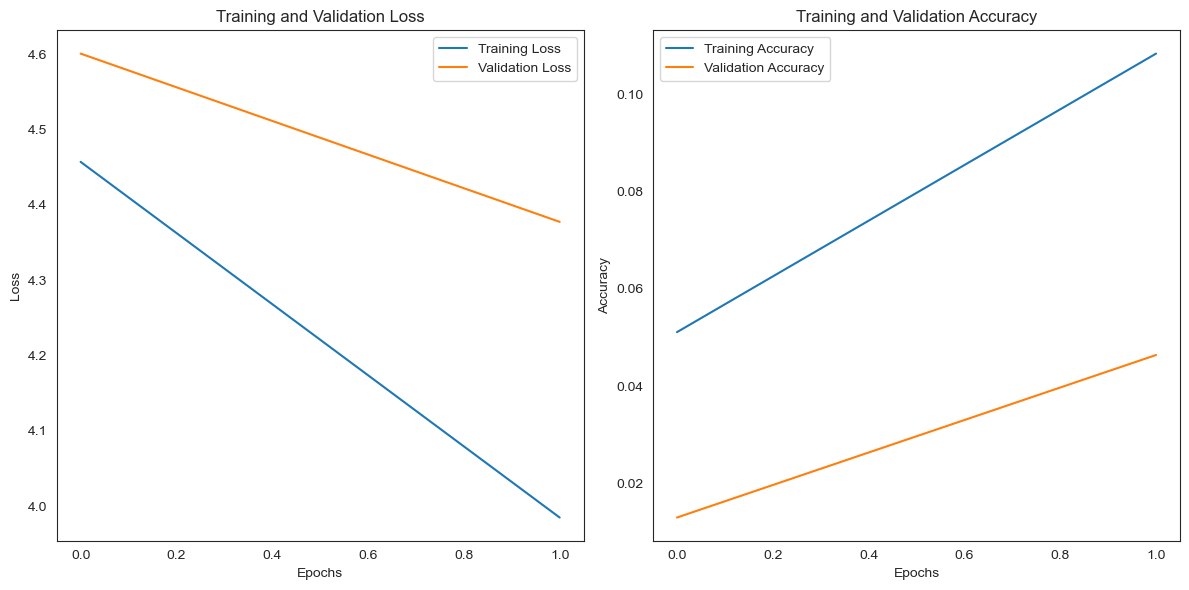

In [54]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Funzione per allenare il modello
def train_model(model, train_df, valid_df, images_dir, class_columns, batch_size=32, epochs=50, image_size=(224, 224)):
    """
    Allena il modello sul dataset fornito.

    Parameters:
    - model: il modello Keras
    - train_df: DataFrame contenente le immagini di addestramento
    - valid_df: DataFrame contenente le immagini di validazione
    - images_dir: Directory delle immagini
    - class_columns: Colonne delle etichette
    - batch_size: int, dimensione del batch
    - epochs: int, numero di epoche
    - image_size: tuple, dimensioni finali delle immagini (altezza, larghezza)

    Returns:
    - history: l'oggetto storico dell'addestramento
    """

    # Preprocessing delle immagini
    train_datagen = ImageDataGenerator(
        rescale=1./255,  # Normalizzazione dell'immagine
        rotation_range=20,  # Rotazione casuale
        width_shift_range=0.2,  # Traslazione orizzontale
        height_shift_range=0.2,  # Traslazione verticale
        shear_range=0.2,  # Shearing (taglio delle immagini)
        zoom_range=0.2,  # Zoom
        horizontal_flip=True,  # Riflessione orizzontale
        fill_mode='nearest')  # Modalità di riempimento

    valid_datagen = ImageDataGenerator(rescale=1./255)  # Solo normalizzazione per il validation set

    # Generatori per caricare i dati
    train_generator = train_datagen.flow_from_dataframe(
        train_df,
        directory=images_dir,
        x_col='image_name',
        y_col=class_columns,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='raw')  # La modalità 'raw' permette di usare le etichette one-hot

    valid_generator = valid_datagen.flow_from_dataframe(
        valid_df,
        directory=images_dir,
        x_col='image_name',
        y_col=class_columns,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='raw')

    # EarlyStopping per prevenire overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Allenamento del modello
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=valid_generator,
        callbacks=[early_stopping],
        verbose=1)  # Mostra progressi durante l'allenamento

    return history

# Funzione per tracciare i grafici
def plot_training_history(history):
    # Plotting the Training and Validation Loss
    plt.figure(figsize=(12, 6))

    # Subplot per la loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Subplot per l'accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Mostrare il grafico
    plt.tight_layout()
    plt.show()

# Allenamento del modello
history = train_model(model, train_df, valid_df, images_dir, class_columns)

# Tracciare i grafici di Loss e Accuracy
plot_training_history(history)